In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Spain

Merge with spv(solar panels) and temperature data

In [53]:
df_es = pd.read_csv("../Data/historical_metering_data_ES.csv")
df_es.rename(columns={df_es.columns[0]: "DATETIME"}, inplace=True)
df_es['DATETIME'] = pd.to_datetime(df_es['DATETIME'])
df_es.set_index('DATETIME', inplace=True)
df_es["DATETIME"] = df_es.index

df_forecasts = pd.read_excel("../Data/spv_ec00_forecasts_es_it.xlsx")
df_forecasts.rename(columns={'Unnamed: 0': 'DATETIME'}, inplace=True)
df_forecasts['DATETIME'] = pd.to_datetime(df_forecasts['DATETIME'])
df_forecasts.set_index("DATETIME", inplace=True)

df_es = df_es.merge(df_forecasts[["spv", "temp"]], left_index=True, right_index=True, how="left")

In [54]:
holiday_df = pd.read_excel("../data/holiday_ES.xlsx")

holiday_dates = pd.to_datetime(holiday_df['holiday_ES']).dt.date

df_es['holiday'] = pd.Series(df_es.index.date, index=df_es.index).isin(holiday_dates).astype(int)

df_es['holiday'] = df_es['holiday'].astype(int)
df_es["holiday"]

DATETIME
2022-01-01 00:00:00    1
2022-01-01 01:00:00    1
2022-01-01 02:00:00    1
2022-01-01 03:00:00    1
2022-01-01 04:00:00    1
                      ..
2024-07-31 19:00:00    0
2024-07-31 20:00:00    0
2024-07-31 21:00:00    0
2024-07-31 22:00:00    0
2024-07-31 23:00:00    0
Name: holiday, Length: 22629, dtype: int64

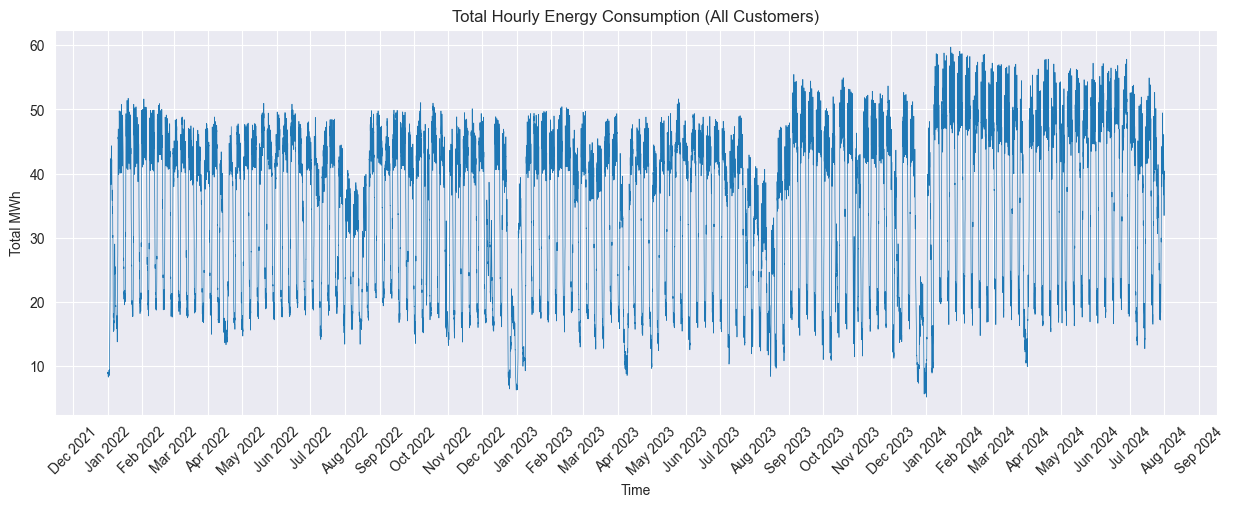

In [55]:
import matplotlib.dates as mdates

consumption_cols = [col for col in df_es.columns if col.startswith("VALUEMWHMETERINGDATA_")]
df_es["total_consumption"] = df_es[consumption_cols].sum(axis=1)

plt.figure(figsize=(15, 5))
plt.plot(df_es["DATETIME"], df_es["total_consumption"], linewidth=0.5)

plt.title("Total Hourly Energy Consumption (All Customers)")
plt.xlabel("Time")
plt.ylabel("Total MWh")
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()

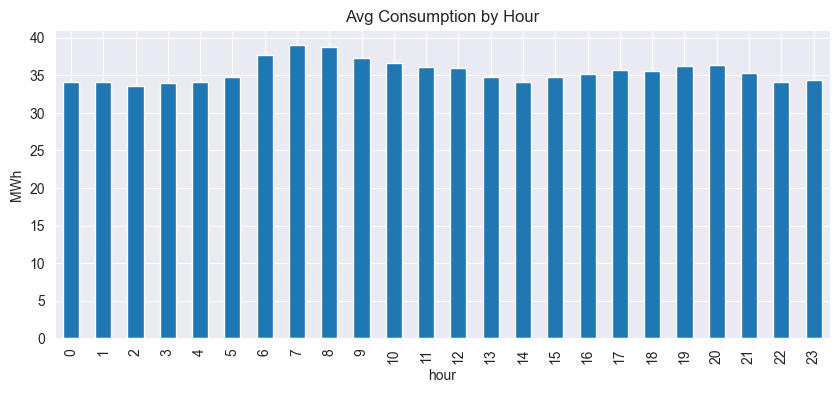

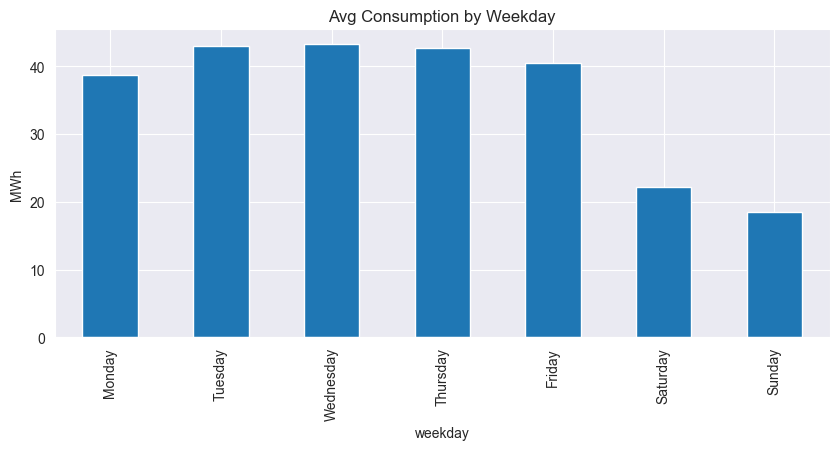

In [56]:
df_es['hour'] = df_es.index.hour
df_es['weekday'] = df_es.index.day_name()

df_es.groupby('hour')['total_consumption'].mean().plot(kind='bar', figsize=(10, 4), title="Avg Consumption by Hour")
plt.ylabel("MWh")
plt.grid(True)
plt.show()

df_es.groupby('weekday')['total_consumption'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', figsize=(10, 4), title="Avg Consumption by Weekday")
plt.ylabel("MWh")
plt.grid(True)
plt.show()

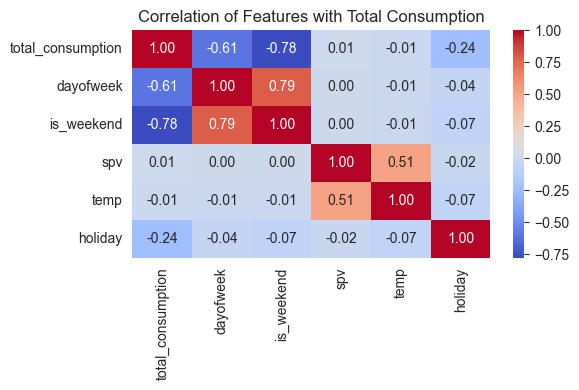

In [57]:
# Select some relevant features
df_es["dayofweek"] = df_es["DATETIME"].dt.dayofweek
df_es["is_weekend"] = (df_es["dayofweek"] >= 5).astype(int)
corr_df = df_es[["total_consumption", "dayofweek", "is_weekend", "spv", "temp", "holiday"]]

corr_matrix = corr_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Features with Total Consumption")
plt.tight_layout()
plt.show()


# Italy

In [58]:
df_es = pd.read_csv("../Data/historical_metering_data_IT.csv")
df_es.rename(columns={df_es.columns[0]: "DATETIME"}, inplace=True)
df_es['DATETIME'] = pd.to_datetime(df_es['DATETIME'])
df_es.set_index('DATETIME', inplace=True)

df_forecasts = pd.read_excel("../Data/spv_ec00_forecasts_es_it.xlsx")
df_forecasts.rename(columns={'Unnamed: 0': 'DATETIME'}, inplace=True)
df_forecasts['DATETIME'] = pd.to_datetime(df_forecasts['DATETIME'])
df_forecasts.set_index("DATETIME", inplace=True)

df_es = df_es.merge(df_forecasts[["spv", "temp"]], left_index=True, right_index=True, how="left")

In [59]:
holiday_df = pd.read_excel("../data/holiday_IT.xlsx")

holiday_dates = pd.to_datetime(holiday_df['holiday_IT']).dt.date
df_es["DATETIME"] = df_es.index
df_es['holiday'] = pd.Series(df_es.index.date, index=df_es.index).isin(holiday_dates).astype(int)

df_es['holiday'] = df_es['holiday'].astype(int)

DATETIME
2022-01-01 00:00:00    1
2022-01-01 01:00:00    1
2022-01-01 02:00:00    1
2022-01-01 03:00:00    1
2022-01-01 04:00:00    1
                      ..
2024-07-31 19:00:00    0
2024-07-31 20:00:00    0
2024-07-31 21:00:00    0
2024-07-31 22:00:00    0
2024-07-31 23:00:00    0
Name: holiday, Length: 22629, dtype: int64

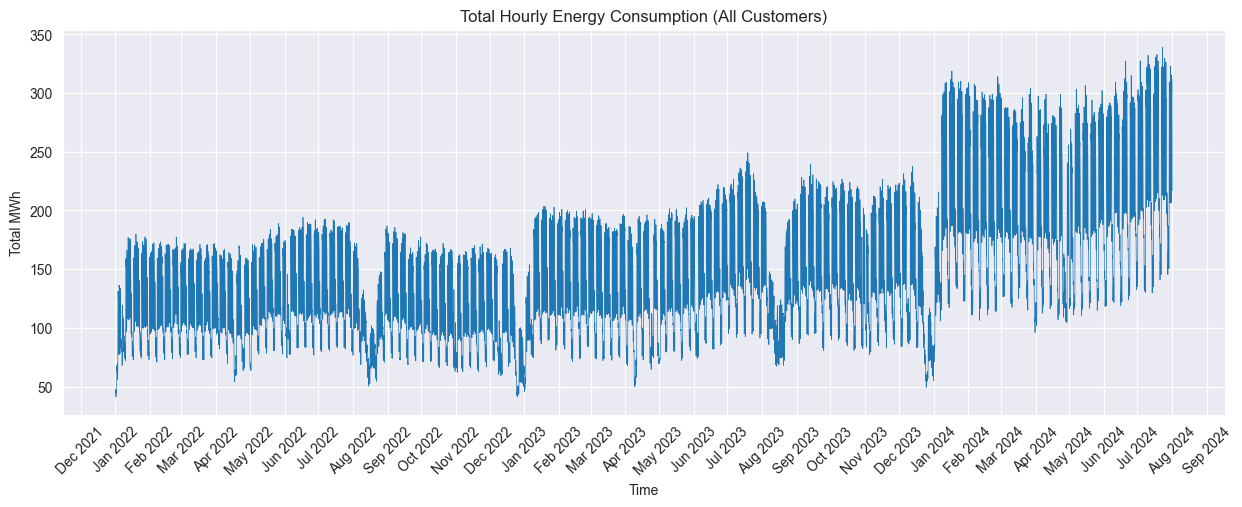

In [60]:
import matplotlib.dates as mdates

consumption_cols = [col for col in df_es.columns if col.startswith("VALUEMWHMETERINGDATA_")]
df_es["total_consumption"] = df_es[consumption_cols].sum(axis=1)

plt.figure(figsize=(15, 5))
plt.plot(df_es["DATETIME"], df_es["total_consumption"], linewidth=0.5)

plt.title("Total Hourly Energy Consumption (All Customers)")
plt.xlabel("Time")
plt.ylabel("Total MWh")
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()

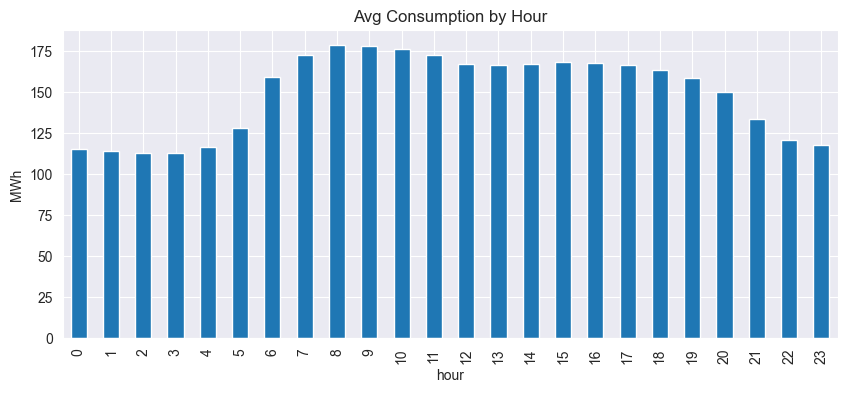

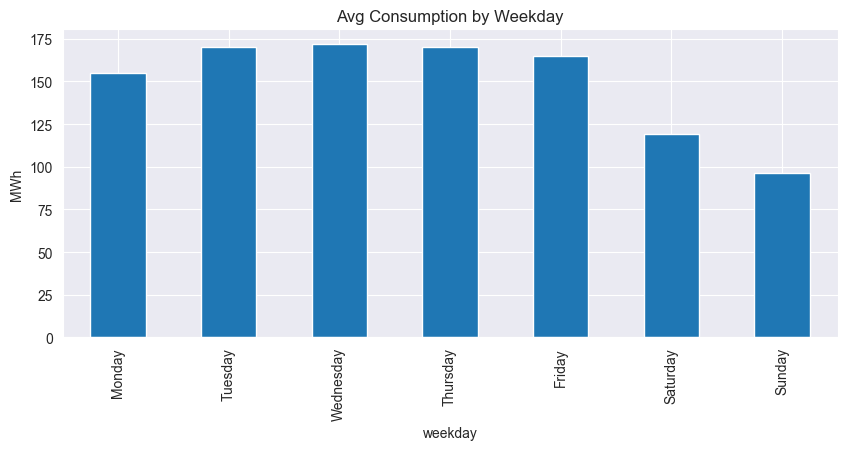

In [61]:
df_es['hour'] = df_es.index.hour
df_es['weekday'] = df_es.index.day_name()

df_es.groupby('hour')['total_consumption'].mean().plot(kind='bar', figsize=(10, 4), title="Avg Consumption by Hour")
plt.ylabel("MWh")
plt.grid(True)
plt.show()

df_es.groupby('weekday')['total_consumption'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', figsize=(10, 4), title="Avg Consumption by Weekday")
plt.ylabel("MWh")
plt.grid(True)
plt.show()

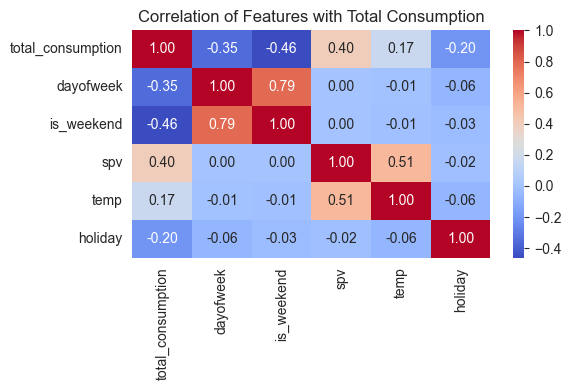

In [62]:
# Select some relevant features
df_es["dayofweek"] = df_es["DATETIME"].dt.dayofweek
df_es["is_weekend"] = (df_es["dayofweek"] >= 5).astype(int)
corr_df = df_es[["total_consumption", "dayofweek", "is_weekend", "spv", "temp", "holiday"]]

corr_matrix = corr_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Features with Total Consumption")
plt.tight_layout()
plt.show()
